In [1]:
import json
from NumpyModel import Model
from Layers import InputLayer, Conv2D, Dense, DephtwiseConv2D, Flatten
from Activations.ActivationFactory import activation_from_name
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

np.random.seed(2)

# create numpy model

In [2]:
classifier_model_path = "/home/george/Desktop/dnn_processor/reference_algorithm/neural_network/saved_models/classifier_v2/"

modelJson = json.load(open(classifier_model_path + "model.json"))

model = Model()

for layerConfig in modelJson["layers"]:
    if layerConfig["layerType"] == "InputLayer":
        layer = InputLayer(layerConfig["layerName"])

    elif layerConfig["layerType"] == "Conv2D":
        layer = Conv2D(
            padding=layerConfig["layer_config"]["padding"],
            strides=layerConfig["layer_config"]["strides"],
            name=layerConfig["layerName"],
        )
        layer.load_weights(
            classifier_model_path + layerConfig["weightPath"],
            classifier_model_path + layerConfig["biasPath"],
        )

        layer.activation = activation_from_name(layerConfig["activation"])

    elif layerConfig["layerType"] == "DepthwiseConv2D":
        layer = DephtwiseConv2D(
            padding=layerConfig["layer_config"]["padding"],
            strides=layerConfig["layer_config"]["strides"],
            name=layerConfig["layerName"],
        )
        layer.load_weights(
            classifier_model_path + layerConfig["weightPath"],
            classifier_model_path + layerConfig["biasPath"],
        )
        layer.activation = activation_from_name(layerConfig["activation"])

    elif layerConfig["layerType"] == "Dense":
        layer = Dense(layerConfig["layerName"])
        layer.load_weights(
            classifier_model_path + layerConfig["weightPath"],
            classifier_model_path + layerConfig["biasPath"],
        )
        layer.activation = activation_from_name(layerConfig["activation"])

    elif layerConfig["layerType"] == "Flatten":
        layer = Flatten(layerConfig["layerName"])

    elif layerConfig["layerType"] == "Dropout":
        print("ignoring not implemented dropout")
        continue

    else:
        print(layerConfig)
        raise NotImplementedError(layerConfig["layerName"])

    model.layers.append(layer)

print(model.layers)

ignoring not implemented dropout
[<Layers.InputLayer.InputLayer object at 0x7feecd53f790>, <Layers.DephtwiseConv2D.DephtwiseConv2D object at 0x7feecd53c4f0>, <Layers.Conv2D.Conv2D object at 0x7feeea73fe50>, <Layers.Conv2D.Conv2D object at 0x7feecd53c850>, <Layers.Flatten.Flatten object at 0x7feecd53ce20>, <Layers.Dense.Dense object at 0x7feecd53d030>]


# test numpy model

In [3]:
input_test = np.ones(shape=[1, 256, 256, 3])

o_ref_model = model(input_test, training=False)

print("model test passed...")
print(o_ref_model)

model test passed...
[[0.07704391 0.05168683 0.77998272 0.0715063  0.01978024]]


[[1.59221189e-14 2.84524004e-12 2.23453142e-10 9.99463822e-01
  5.36178015e-04]]


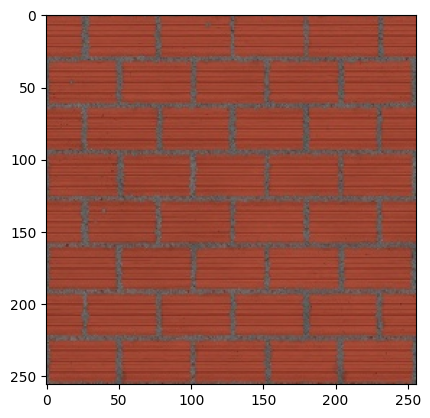

In [4]:


img = cv.imread("/home/george/Desktop/dnn_processor/reference_algorithm/neural_network/resized_dataset_texturas_v2/tijolo_alv/img_100.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) / 255
plt.imshow(img)

# predict
output = model(img[np.newaxis, ...])

print(output)
